In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (162/162), done.


In [4]:

%cd yolov9
!pip install -r requirements.txt -q

/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


In [5]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00


In [7]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
import torch
from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
display.clear_output()

import ultralytics
print(torch.__version__)
print(torch.cuda.is_available())  # Should return True

2.4.1+cu124
True


In [ ]:
import roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="Zs41hUNxQeU2M6ZZDQ4c")
project = rf.workspace("thesis-3r986").project("leather-defect-detection-ofz0a")
version = project.version(5)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Leather-Defect-Detection-1 in yolov9:: 100%|██████████| 2178/2178 [00:00<00:00, 5199.24it/s]


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 200 --img 800 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

Ultralytics YOLOv8.2.98  Python-3.11.9 torch-2.4.1+cu124 CUDA:1 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=F:\Ml files\Leather defect\Ulab thesis\v8\datasets\Leather-Defect-Detection-5\data.yaml, epochs=200, time=None, patience=100, batch=32, imgsz=800, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning F:\Ml files\Leather defect\Ulab thesis\v8\datasets\Leather-Defect-Detection-5\train\labels.cache... 180
val: Scanning F:\Ml files\Leather defect\Ulab thesis\v8\datasets\Leather-Defect-Detection-5\valid\labels.cache... 59 im


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.13G      1.844      3.463      2.257         43        800: 100%|██████████| 57/57 [00:21<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92    0.00262      0.505     0.0942     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      6.15G      1.602      2.673      2.046         41        800: 100%|██████████| 57/57 [00:19<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.125      0.289      0.114     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       6.1G      1.591      2.402      2.039         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92     0.0868      0.226     0.0723     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      6.12G      1.548       2.24      2.016         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.276      0.267       0.23      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      6.16G      1.554       2.16      1.998         32        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.627      0.144      0.251      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.11G      1.518      2.039      1.973         49        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.262      0.296      0.217      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      6.11G      1.466      1.957      1.934         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.458      0.378      0.399      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      6.12G      1.447      1.903      1.911         31        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.443      0.387      0.357      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      6.16G      1.425      1.859      1.907         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.742      0.327      0.376      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      6.11G      1.401      1.799      1.871         45        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.457      0.478       0.41       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.11G      1.382      1.754      1.863         37        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.34      0.383      0.318       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.12G      1.346      1.663      1.824         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.465      0.502      0.463      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.11G      1.352       1.68      1.821         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.48      0.433      0.432      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.11G      1.335      1.632       1.82         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.889      0.395      0.472      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       6.1G        1.3      1.606      1.779         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.606      0.486      0.469       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.12G      1.311      1.578      1.798         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.487      0.513      0.451      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.15G      1.285      1.548       1.77         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.745      0.505      0.542      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      6.11G      1.278      1.497      1.751         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.408      0.496      0.458      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.09G      1.282      1.493      1.752         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.594      0.493       0.53      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.12G      1.272        1.5      1.743         35        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.489      0.438      0.434      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       6.1G      1.265      1.453      1.734         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.64      0.512      0.522      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.12G      1.261      1.455      1.734         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.536      0.479      0.503      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      6.11G      1.263      1.409      1.733         52        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.85      0.412      0.504      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.12G      1.239      1.377      1.704         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.545      0.507      0.518      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       6.1G      1.223      1.352      1.709         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.53      0.527      0.488      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.12G      1.204      1.351      1.681         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.682      0.537      0.558      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.09G      1.211       1.31       1.68         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.605      0.556      0.541      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.11G      1.166       1.28      1.648         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.599      0.518      0.525      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.11G      1.189      1.278      1.659         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.587      0.524      0.561      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.18G      1.194      1.266      1.664         49        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.488      0.526      0.484      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.09G      1.175      1.274      1.663         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.797      0.466       0.53      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.11G      1.165      1.256      1.648         35        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.436      0.474      0.462      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.09G      1.163      1.218      1.636         43        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.717      0.532      0.581      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      6.08G      1.124      1.176      1.618         45        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.687      0.555      0.594      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.09G      1.152      1.178      1.636         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.685      0.464       0.52      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      6.11G      1.147      1.172      1.626         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.607      0.558      0.572      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.11G      1.112      1.139      1.602         27        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.609      0.525      0.526      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.11G      1.124      1.125      1.608         31        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.57      0.485      0.531      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      6.17G      1.128      1.135      1.602         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.665      0.544      0.555      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      6.11G      1.116      1.157      1.599         29        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.55      0.565      0.548      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.15G      1.089      1.097      1.564         37        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.575      0.581      0.598      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      6.11G      1.077      1.083      1.562         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.561      0.583      0.541      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200       6.1G      1.082      1.091      1.562         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.594      0.523      0.531      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      6.11G      1.081      1.073      1.571         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.56       0.56      0.553      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.11G      1.045      1.027      1.532         44        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.544      0.634       0.58      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.11G       1.05      1.014      1.529         31        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.688      0.551       0.57      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.11G      1.047      1.011      1.538         38        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.587      0.569      0.565      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      6.11G      1.052      1.014      1.527         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.581      0.561      0.582      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.11G       1.06      1.003      1.543         37        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.684       0.52      0.523      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      6.12G      1.034     0.9891      1.523         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.557      0.545      0.527      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200       6.1G      1.034     0.9784      1.524         44        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.592      0.524      0.527      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      6.17G      1.025     0.9763      1.521         36        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.721      0.559      0.586      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      6.17G      1.019     0.9606      1.514         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.717      0.487      0.534       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.16G     0.9973      0.948      1.485         48        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.717       0.54      0.562      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200       6.1G     0.9978     0.9173      1.489         27        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.649       0.55      0.548      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.08G      1.014     0.9506      1.499         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.601      0.547      0.546      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      6.11G      1.001     0.9242      1.496         43        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.622      0.561      0.564      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      6.11G      1.002     0.9288      1.498         41        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.678      0.544      0.558      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.11G     0.9942      0.911      1.486         47        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.712      0.569      0.588      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.11G     0.9801     0.9216      1.486         36        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.618      0.593      0.613      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      6.17G     0.9589      0.877      1.448         47        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.526       0.55      0.535      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      6.11G      0.961     0.8924      1.457         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.734       0.47      0.563      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200       6.1G     0.9671     0.8885      1.453         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.693      0.571       0.59      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      6.11G     0.9587     0.8638      1.453         42        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.681      0.585      0.593      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      6.15G     0.9562     0.8723      1.449         30        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.659      0.542       0.55      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.12G      0.959     0.8873       1.45         39        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.762       0.52      0.597       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      6.15G     0.9651     0.8927      1.455         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.634      0.583      0.581      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.08G     0.9389     0.8397      1.431         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.637      0.605      0.559      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       6.1G     0.9509     0.8676      1.443         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.609       0.57      0.565      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      6.16G     0.9181     0.8258      1.415         47        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.743      0.588      0.606       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.11G     0.9296     0.8295       1.43         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.699      0.531       0.56      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      6.11G     0.9368     0.8404      1.436         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.738      0.539      0.625      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      6.17G     0.9134     0.8222      1.419         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.654      0.648       0.62      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      6.18G     0.9181     0.8123      1.406         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.549      0.616      0.548      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      6.16G     0.9072     0.7967      1.413         29        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.627      0.625      0.612      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      6.12G     0.9191     0.7996      1.418         31        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.616      0.564      0.549      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       6.1G     0.9061     0.8011      1.407         47        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.663      0.565      0.583       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      6.12G     0.9159     0.8043       1.43         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.691      0.599      0.599      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.09G     0.9014     0.8093      1.403         52        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.685      0.634      0.632       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.16G     0.9135     0.8141      1.419         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.617        0.6       0.59      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      6.15G     0.8811     0.7707      1.388         58        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.68      0.569      0.601      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      6.11G     0.8948      0.792        1.4         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.665       0.54      0.585      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      6.11G     0.9181     0.8144      1.413         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.648      0.466      0.517      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      6.12G     0.8673     0.7619      1.364         63        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.693      0.574      0.584      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       6.1G     0.8464     0.7281      1.354         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.745      0.581      0.619      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      6.11G     0.8464     0.7314      1.358         45        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.697      0.583      0.605      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      6.17G     0.8678      0.758      1.384         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.709      0.563      0.586      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.11G     0.8562     0.7472       1.36         55        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.674      0.527       0.53      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.09G     0.8798     0.7778      1.386         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.749      0.518      0.577      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      6.11G     0.8556     0.7518      1.361         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.705      0.612      0.627      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      6.09G     0.8417     0.7199      1.342         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.717      0.567      0.596      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.11G     0.8362     0.7311      1.343         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.611      0.584      0.584      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.11G     0.8475     0.7403      1.362         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.563      0.644      0.586      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.11G     0.8398     0.7034      1.347         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.715       0.52      0.569      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.11G     0.8391     0.7233      1.358         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.703      0.588      0.601       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      6.08G     0.8303     0.7101      1.338         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.745      0.555      0.609      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       6.1G     0.8378     0.7133      1.352         45        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.733      0.588      0.614      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.11G     0.8363     0.7054      1.339         51        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.748      0.524      0.581      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.11G     0.8208     0.6903      1.333         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.702      0.537      0.568       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      6.08G     0.8411     0.7126      1.352         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.763       0.57      0.646      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.15G     0.7999      0.688      1.315         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.607      0.591       0.58      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.11G     0.8105     0.6815      1.323         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.652      0.566      0.577      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.16G     0.8014      0.679      1.332         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.825      0.505        0.6      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.17G     0.8041     0.6883      1.306         55        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.758      0.571      0.603      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       6.1G     0.7984     0.6793      1.318         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.713      0.581      0.613       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.11G     0.8051     0.6894      1.324         38        800: 100%|██████████| 57/57 [00:19<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.719      0.602      0.609       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200       6.1G     0.7967     0.6695      1.302         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.671      0.515      0.549      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.17G      0.802     0.6782      1.315         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.664      0.566       0.59      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       6.1G     0.7902     0.6654      1.302         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.778      0.529      0.607      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.16G     0.7912     0.6762      1.316         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.65      0.558      0.549      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       6.1G     0.7927     0.6606      1.314         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.731      0.542      0.575      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.11G     0.7756     0.6318      1.298         29        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.681      0.571      0.593      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      6.15G     0.7866     0.6513      1.295         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.649      0.592       0.58      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.17G     0.7684     0.6391      1.283         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.68      0.575      0.583      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      6.18G     0.7637     0.6427      1.292         27        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.707      0.554      0.583      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      6.11G     0.7683     0.6455       1.28         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.703      0.612      0.621      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      6.11G     0.7452     0.6255      1.275         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.681      0.612      0.602      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      6.11G     0.7486     0.6184      1.275         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.794      0.566      0.614      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      6.11G     0.7525     0.6225      1.273         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.79      0.588      0.627      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      6.11G     0.7427     0.6137      1.283         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.637      0.606      0.608      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      6.11G     0.7485     0.6268      1.271         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.755      0.573       0.61      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      6.08G     0.7458     0.6311      1.274         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.688      0.591      0.629      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      6.09G     0.7421      0.616      1.258         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.682      0.539      0.576      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      6.11G     0.7504     0.6298      1.274         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.689      0.615      0.613      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.15G     0.7353     0.6133      1.252         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.692        0.6      0.613      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      6.11G      0.754     0.6317      1.277         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.685      0.582      0.584      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       6.1G      0.732     0.6025      1.259         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.64      0.569      0.569      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      6.08G     0.7349     0.6213      1.265         27        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.757      0.567       0.62      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      6.09G     0.7236     0.5936      1.256         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.734      0.561      0.585      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      6.11G     0.7099     0.5852      1.242         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.757      0.561       0.62      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      6.09G     0.7061      0.587      1.243         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.708      0.581       0.62      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      6.16G     0.7199     0.6017      1.261         47        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.621      0.627      0.607       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      6.17G     0.7204      0.589       1.25         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.641      0.566      0.575      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      6.12G     0.7099      0.588       1.23         50        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.703      0.585      0.609      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      6.09G     0.7061     0.5848       1.24         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.702      0.563      0.586      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      6.11G     0.7027     0.5827      1.235         48        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.744      0.556      0.612       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      6.11G     0.6929     0.5755      1.237         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.75      0.578      0.614      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      6.08G     0.6838     0.5672      1.223         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.708      0.562      0.628      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       6.1G     0.6868     0.5708      1.227         49        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.693      0.598      0.617      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      6.18G     0.6726     0.5519      1.216         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.747      0.578      0.619      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      6.11G     0.7019     0.5714      1.236         50        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.669      0.574      0.591      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      6.16G     0.6966     0.5715      1.224         48        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.781      0.565      0.626       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      6.16G     0.6794      0.568      1.214         28        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.752      0.554       0.63      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      6.12G     0.6668     0.5551       1.21         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.596      0.638      0.616      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      6.11G     0.6762     0.5624      1.216         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.741       0.58      0.631      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      6.16G     0.6609     0.5465      1.206         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.714      0.582      0.631      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200       6.1G      0.668     0.5469       1.21         34        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.82      0.581      0.642      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      6.11G      0.663     0.5479      1.212         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.662      0.582      0.612      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      6.09G     0.6585     0.5391      1.205         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.762      0.541      0.593      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      6.16G     0.6611      0.538      1.209         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.676      0.569      0.591      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      6.09G      0.663     0.5318      1.209         33        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.617      0.606      0.582      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      6.11G     0.6724     0.5598       1.21         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.695      0.544        0.6      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      6.11G     0.6646     0.5507      1.204         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.678      0.562      0.602      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      6.11G     0.6472     0.5339      1.199         50        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.545       0.63      0.571      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      6.16G     0.6445     0.5343      1.191         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.742      0.524      0.591      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      6.12G     0.6602     0.5406      1.197         35        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.76      0.519      0.593      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      6.09G     0.6399     0.5269      1.194         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.682      0.563      0.589      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      6.11G     0.6379     0.5221      1.189         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.585      0.622      0.622      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200       6.1G     0.6433     0.5187      1.198         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.625      0.585      0.605      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      6.11G     0.6371     0.5248      1.191         36        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.811      0.533      0.607       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.11G     0.6303     0.5117      1.178         44        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.711      0.575      0.633      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      6.08G     0.6355     0.5232      1.176         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.65      0.595      0.615      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.09G     0.6206     0.5078      1.188         30        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.696      0.601      0.613      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.17G     0.6181     0.5078      1.174         45        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.67        0.6      0.627      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      6.11G     0.6242     0.5108      1.173         28        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.788      0.543      0.614      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      6.11G     0.6392     0.5191      1.187         38        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.745      0.565      0.604      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      6.15G     0.6334      0.517      1.185         35        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.709      0.577      0.611      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      6.12G     0.6153     0.5063      1.166         46        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.618       0.62       0.62      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      6.11G     0.6141     0.4975      1.177         42        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.658      0.602      0.603      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.08G     0.6127     0.5045      1.174         43        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.658      0.606      0.624      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      6.15G     0.6082     0.4906      1.166         41        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.606      0.603      0.608      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      6.11G     0.6122     0.5047      1.176         37        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.732      0.532      0.597      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       6.1G     0.6095        0.5       1.16         37        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.785      0.537      0.612       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      6.12G     0.6057     0.4917      1.166         31        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.646      0.618      0.619      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      6.11G     0.5944      0.479      1.158         49        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.635      0.606      0.602       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       6.2G     0.6003     0.4943      1.168         30        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.625       0.58      0.595      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       6.1G     0.5933     0.4889      1.152         47        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.745      0.557      0.595      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      6.08G      0.587      0.474      1.148         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.73      0.573       0.61      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200       6.1G     0.5842     0.4671      1.146         32        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.662      0.622      0.616      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      6.11G     0.5828     0.4667      1.147         56        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.676      0.613      0.618      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       6.1G     0.5937     0.4823      1.156         32        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.677      0.599      0.609      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      6.12G     0.5815     0.4694       1.14         39        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.689      0.601      0.628       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      6.15G     0.5779     0.4672      1.148         35        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.734      0.591      0.619      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      6.11G     0.5718     0.4737      1.142         48        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.64       0.61      0.608      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200       6.1G     0.5794     0.4729      1.149         31        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.658      0.634      0.635      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      6.11G     0.5771     0.4709      1.145         40        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.698      0.578       0.62      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      6.11G     0.5731     0.4667      1.142         50        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.704      0.558       0.62      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      6.11G     0.5811     0.4751      1.149         43        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.656      0.585      0.611      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      6.11G     0.5788     0.4746       1.15         46        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.72       0.58      0.615      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      6.16G     0.5692     0.4568      1.143         48        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.691      0.544      0.596      0.396


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.09G     0.6046     0.5253       1.25         16        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92       0.72      0.544      0.595      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      6.17G     0.5589     0.4131      1.213         25        800: 100%|██████████| 57/57 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.725      0.526      0.614      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      6.09G     0.5443      0.392       1.19         17        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.761      0.541      0.615      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      6.08G     0.5299      0.387      1.195         18        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.741      0.536      0.614      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.09G     0.5188     0.3727      1.175         22        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.721      0.562      0.618      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      6.08G     0.5192     0.3814      1.174         20        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.825      0.513      0.623      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      6.11G     0.5111     0.3621       1.17         14        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.801      0.518      0.623      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      6.17G     0.5123     0.3736      1.173         16        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.801       0.53      0.618      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.07G     0.5078     0.3639      1.176         17        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.776      0.533      0.613       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.12G     0.5042     0.3631      1.167         16        800: 100%|██████████| 57/57 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         59         92      0.729      0.561      0.613      0.387



200 epochs completed in 1.079 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.98  Python-3.11.9 torch-2.4.1+cu124 CUDA:1 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         59         92      0.831      0.512      0.623      0.408
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002199E2B5850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [1]:
!python val.py \
--weights {HOME}/runs/detect/train3/weights/best.pt

Ultralytics YOLOv9  Python-3.11.9 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning F:\Ml files\Leather defect\Ulab thesis\v8\datasets\Leather-Defect-Detection-5\valid\labels.cache... 59 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00, 1.25s/it]
                   all         59         92      0.826      0.723      0.775      0.688
                   Cut         14         15      0.832      0.762      0.796      0.598
                  Fold         18         25      0.769       0.62      0.704      0.518
                  Good         17         17          1      0.939      0.998      0.799
               Scratch         16         35      0.703      0.654      0.683      0.419
Speed: 2.4ms preprocess, 12.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\val


In [ ]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
# from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [ ]:
import matplotlib.pyplot as plt
model_path = '/content/yolov9/runs/detect/train3/'


def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

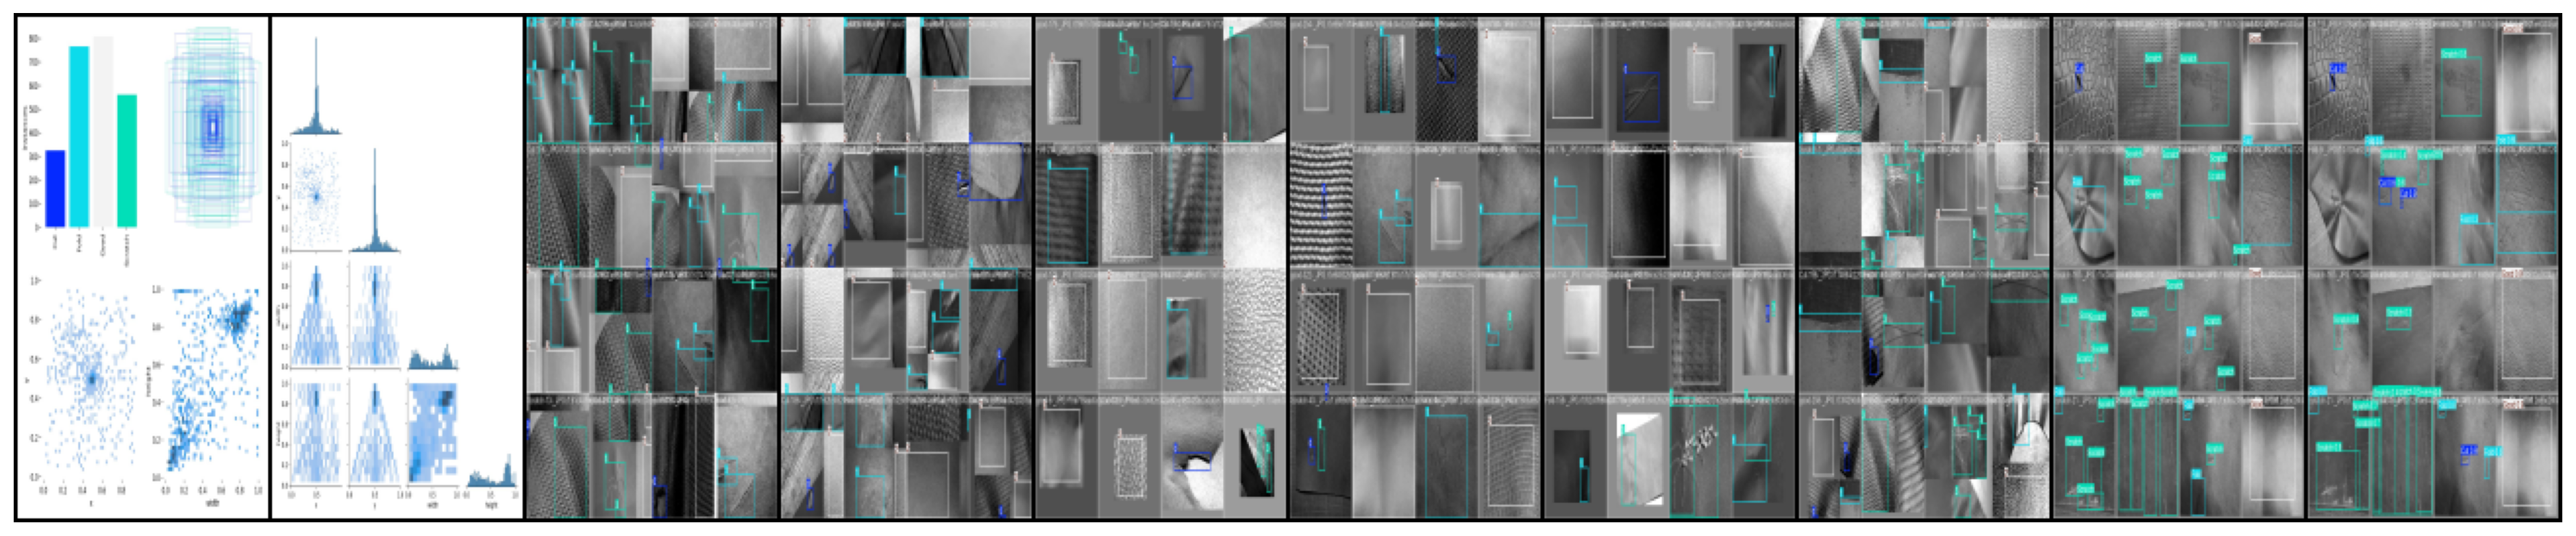

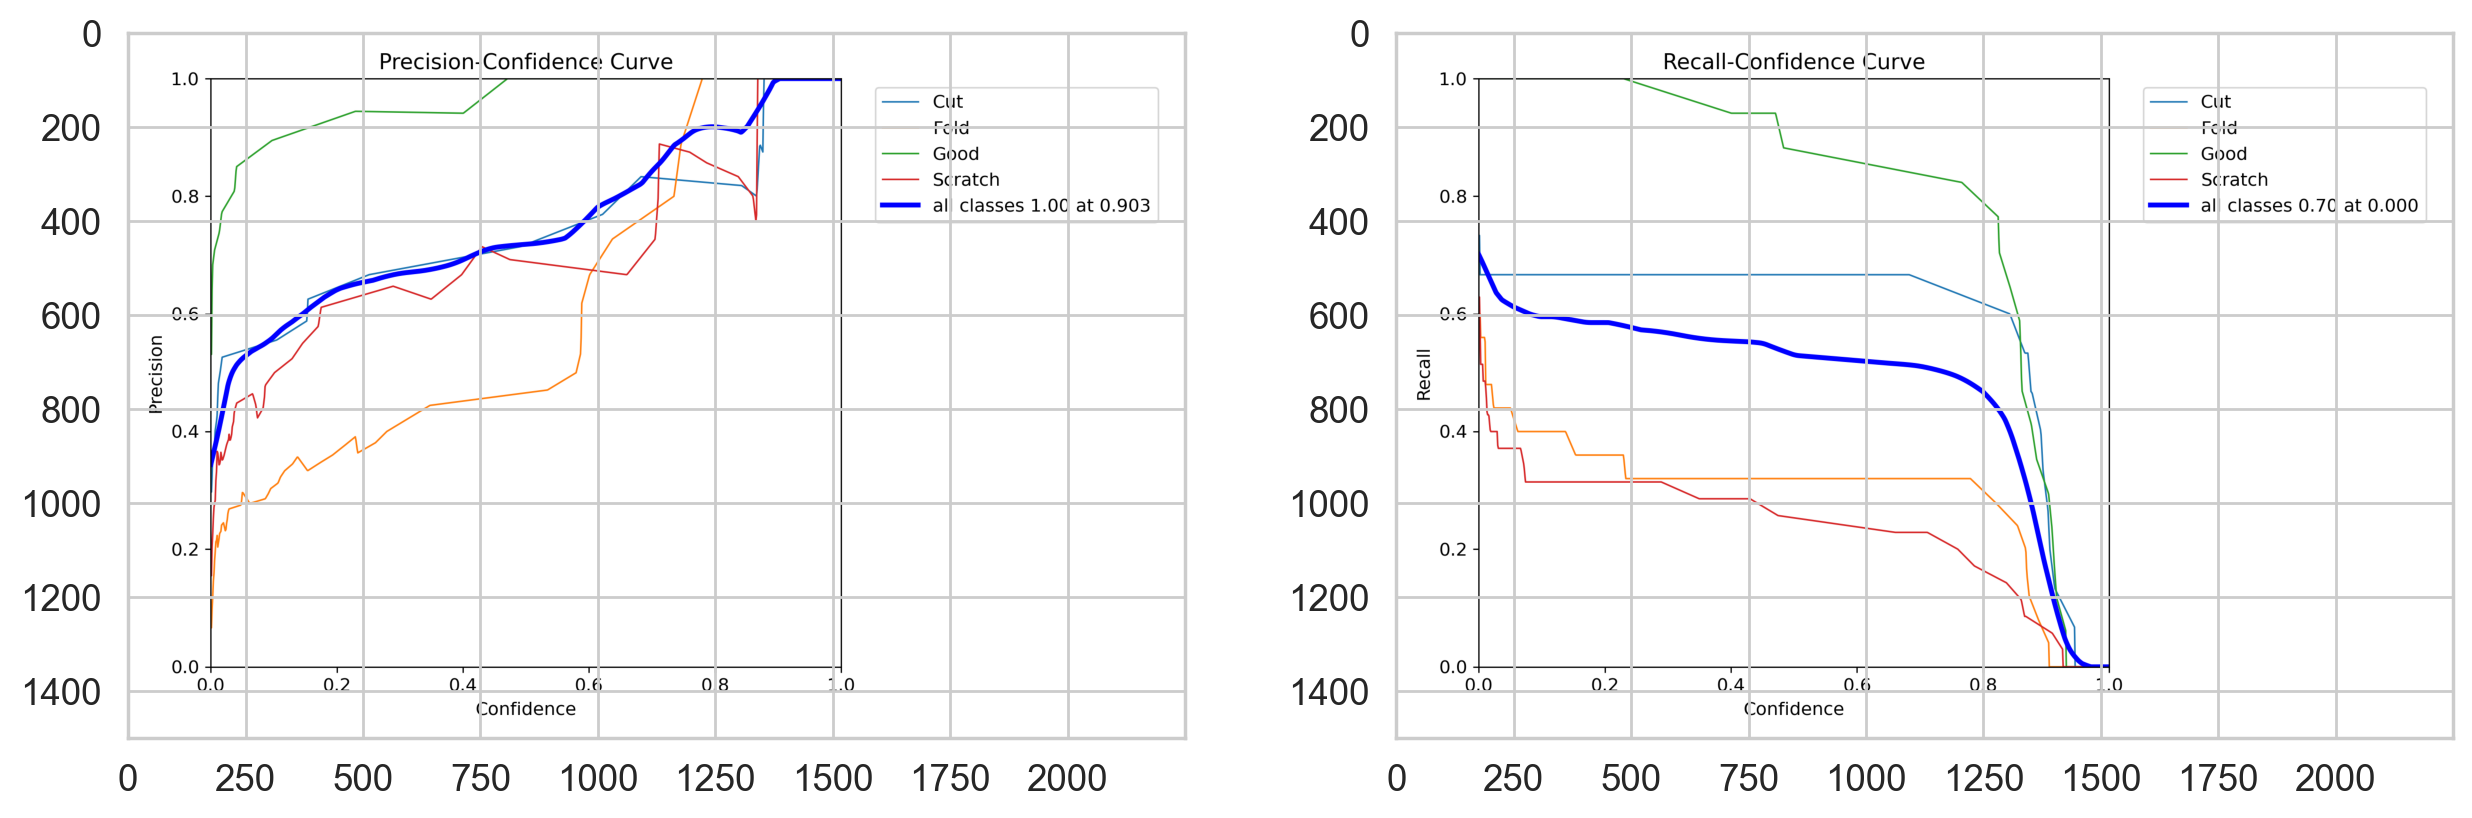

In [ ]:
plot(['P_curve.png','R_curve.png'], (1,2))

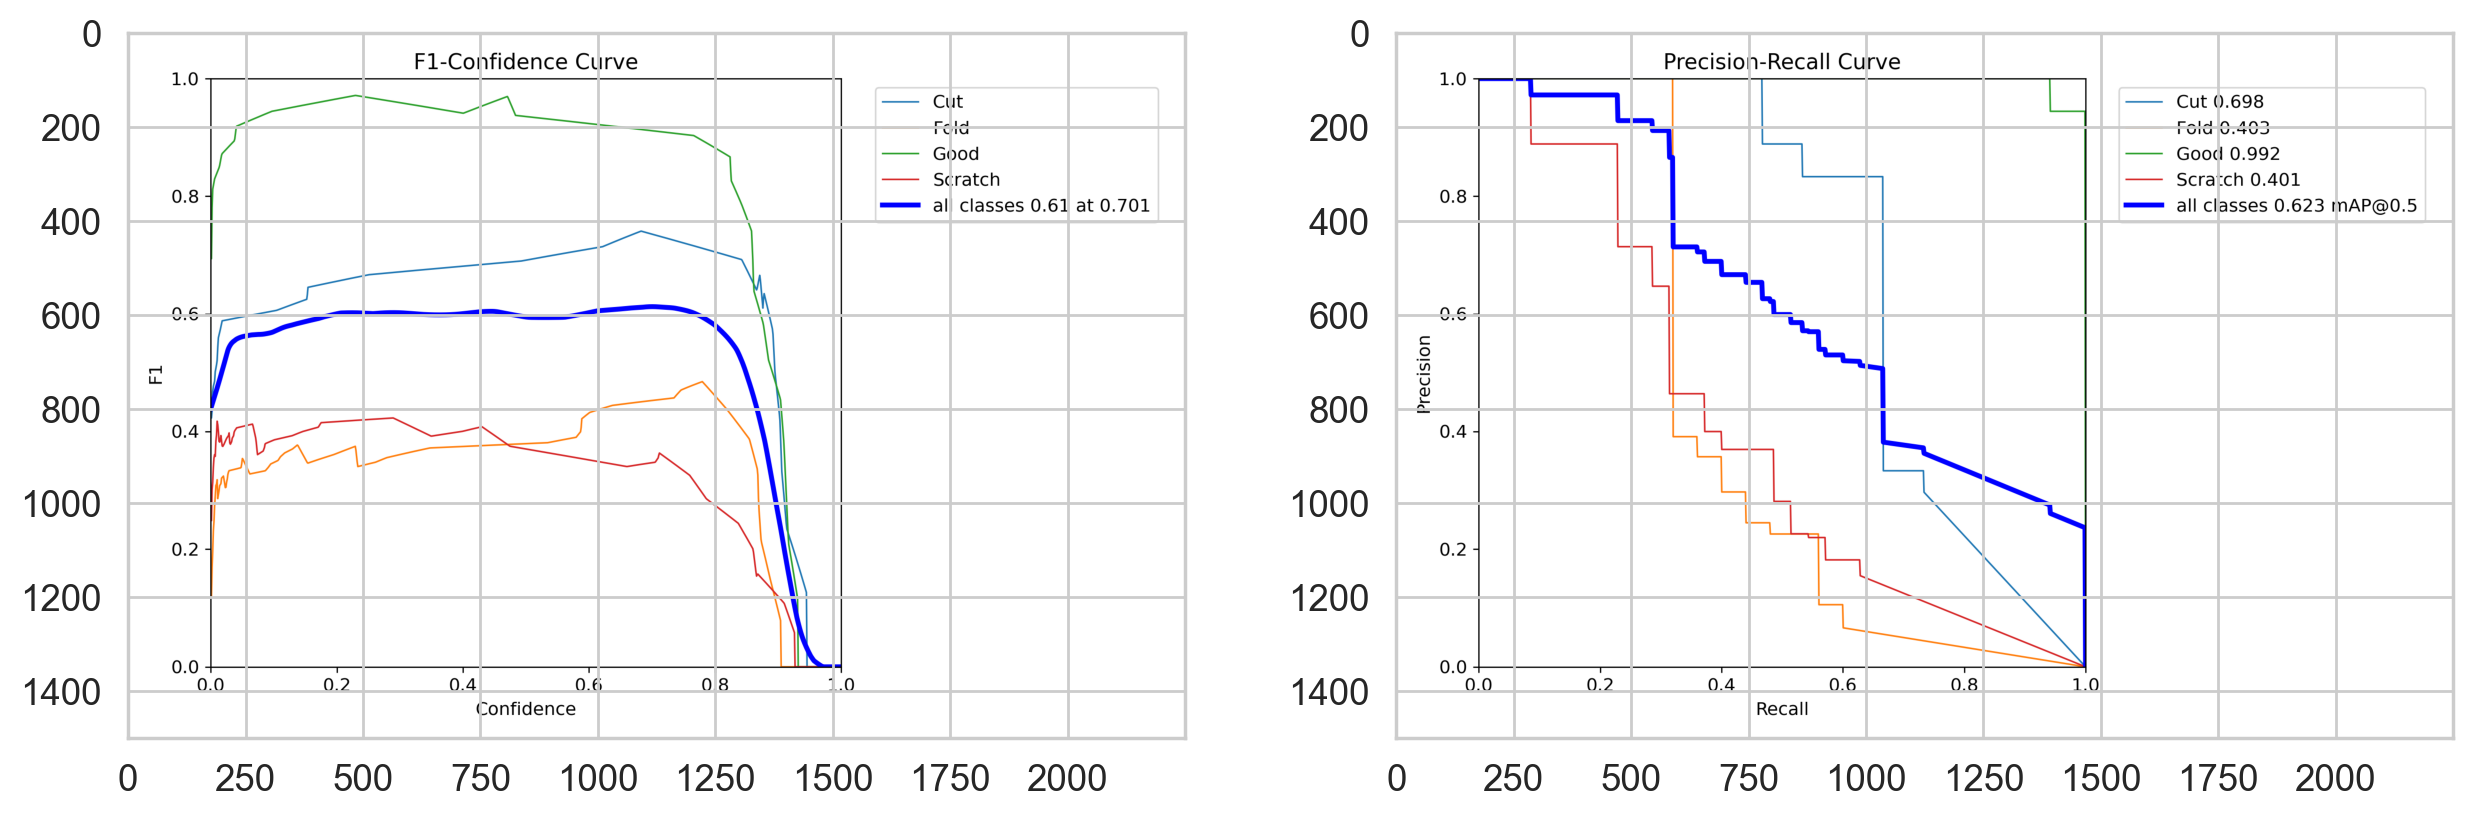

In [ ]:
plot(['F1_curve.png','PR_curve.png'], (1,2))

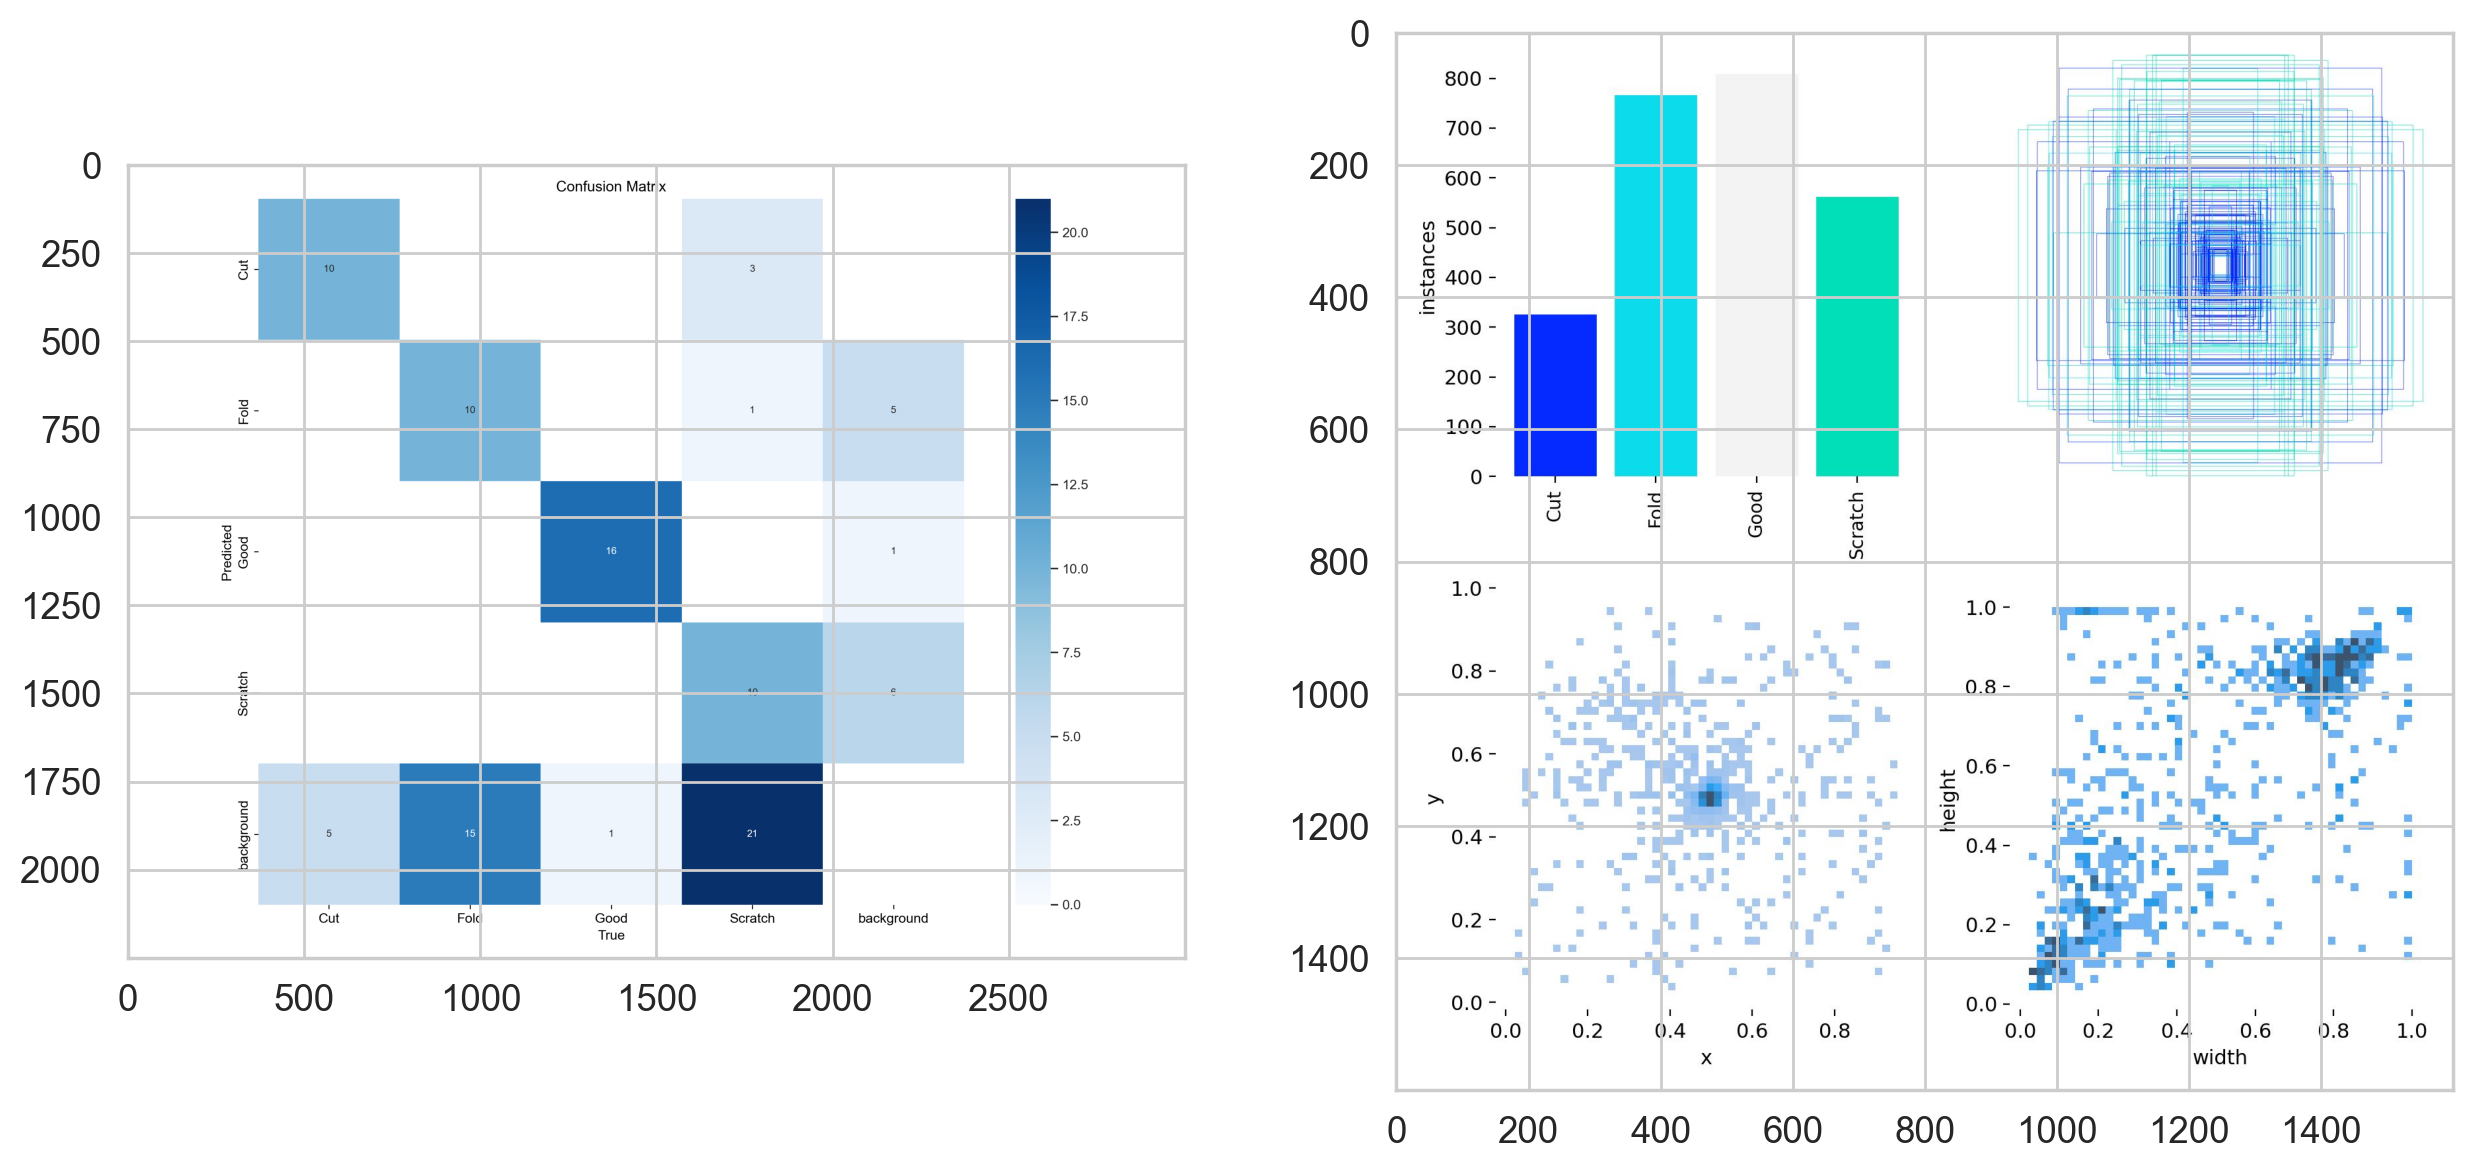

In [ ]:
plot(['confusion_matrix.png','labels.jpg'], (1,2))

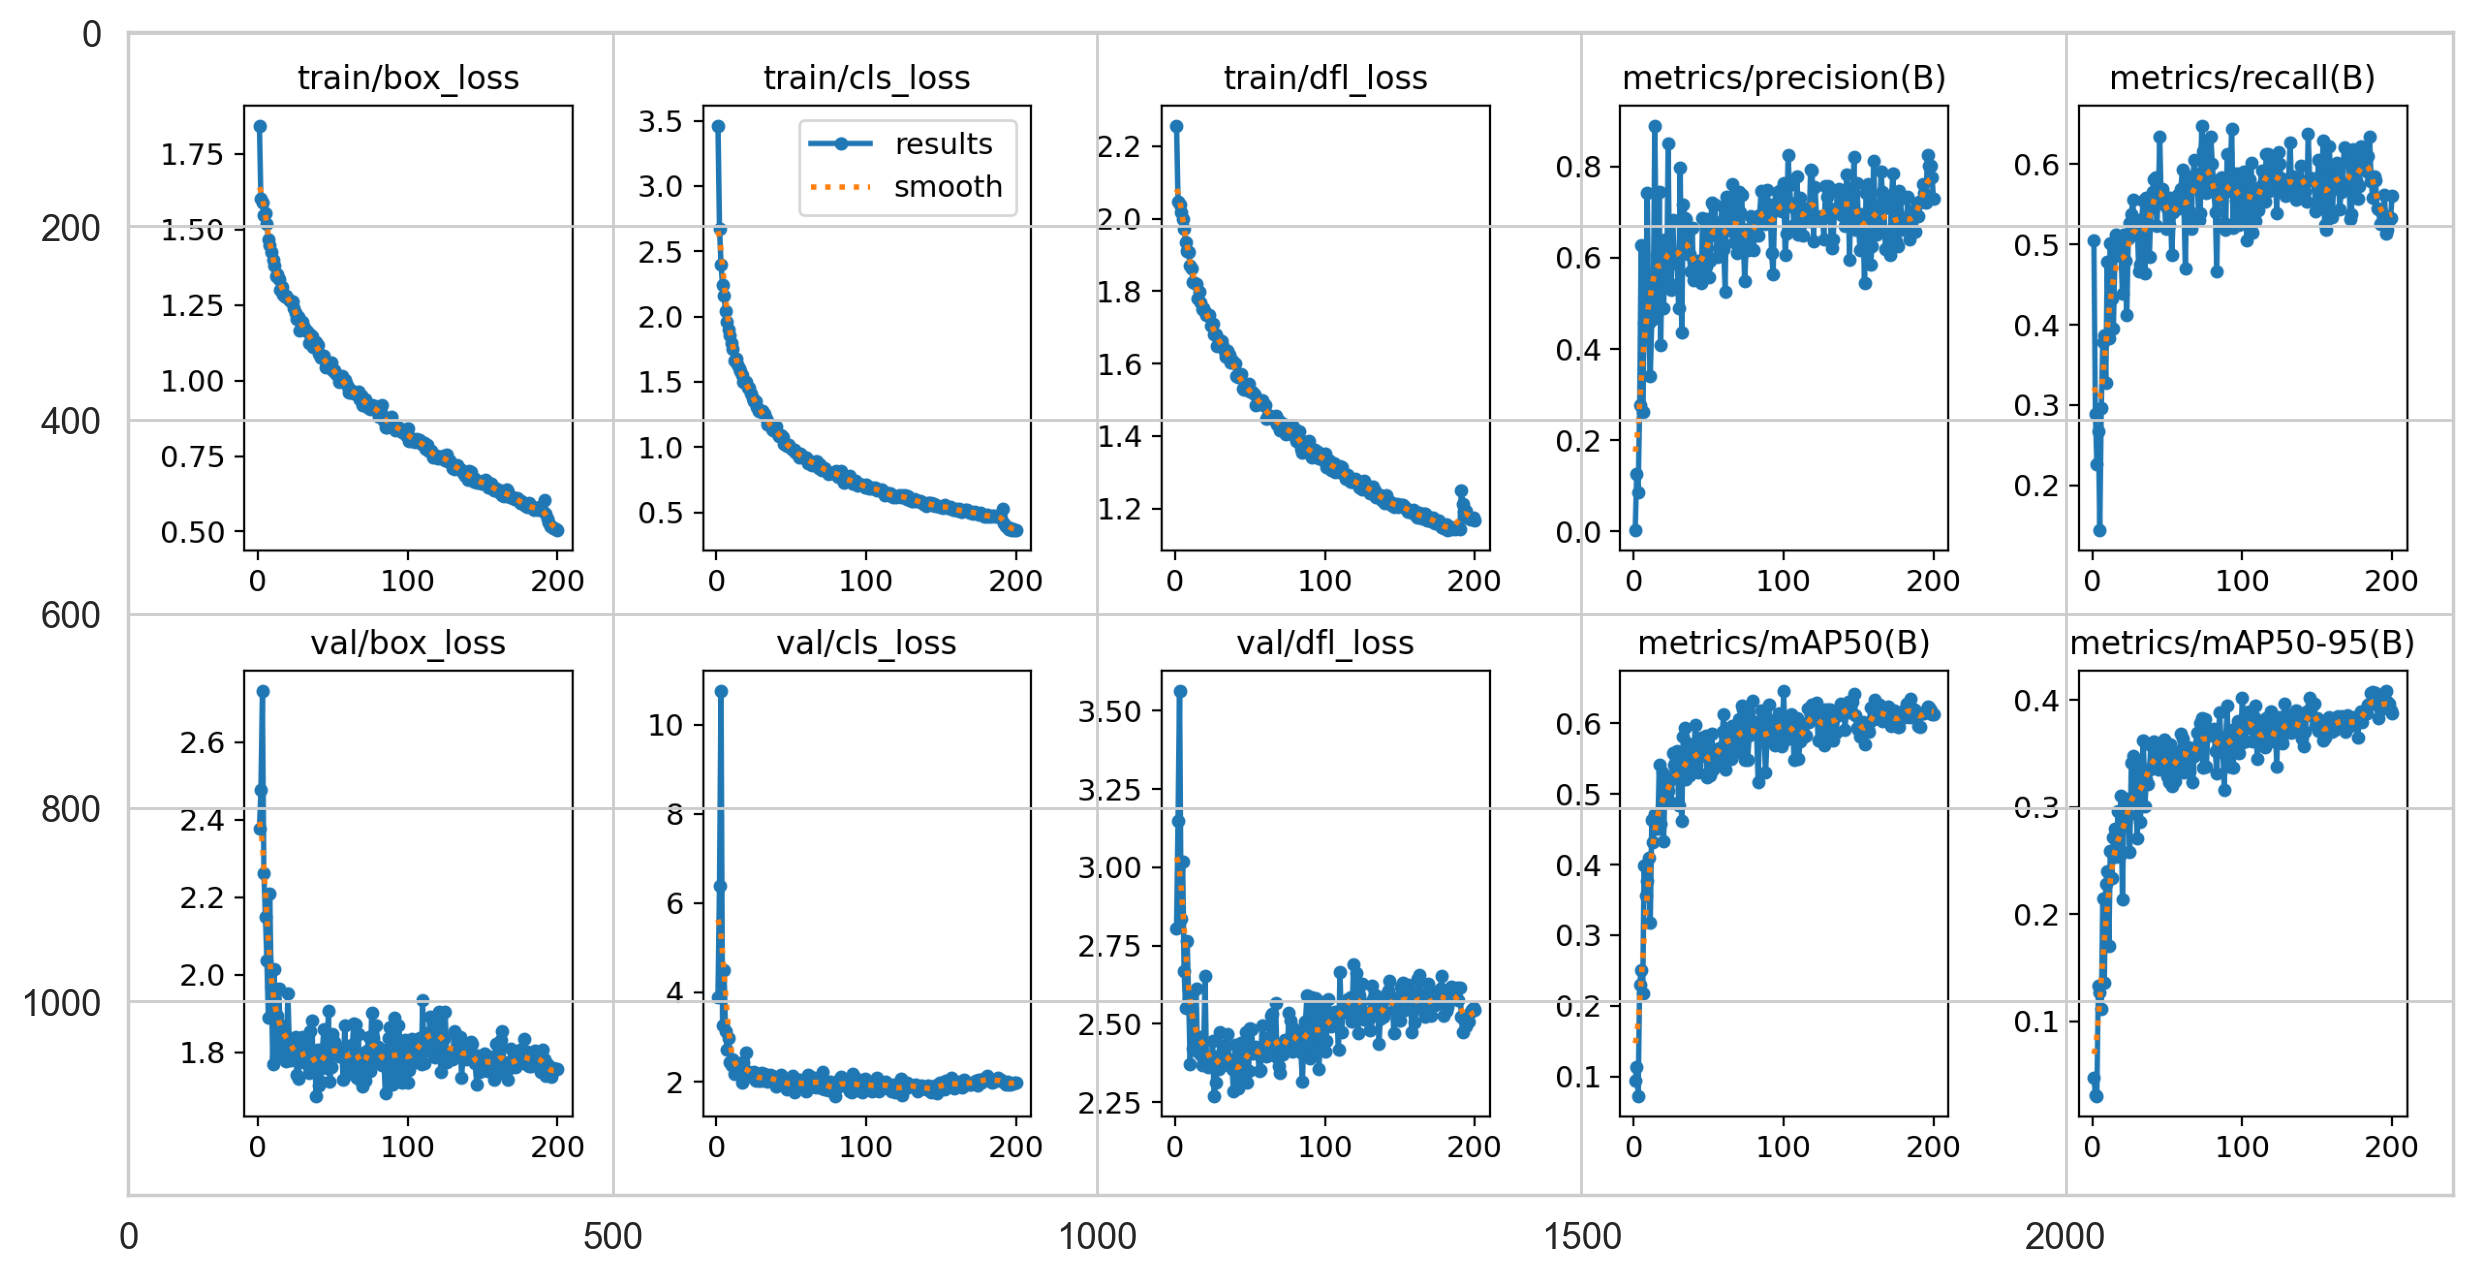

In [ ]:
plot(['results.png'],(1,1))

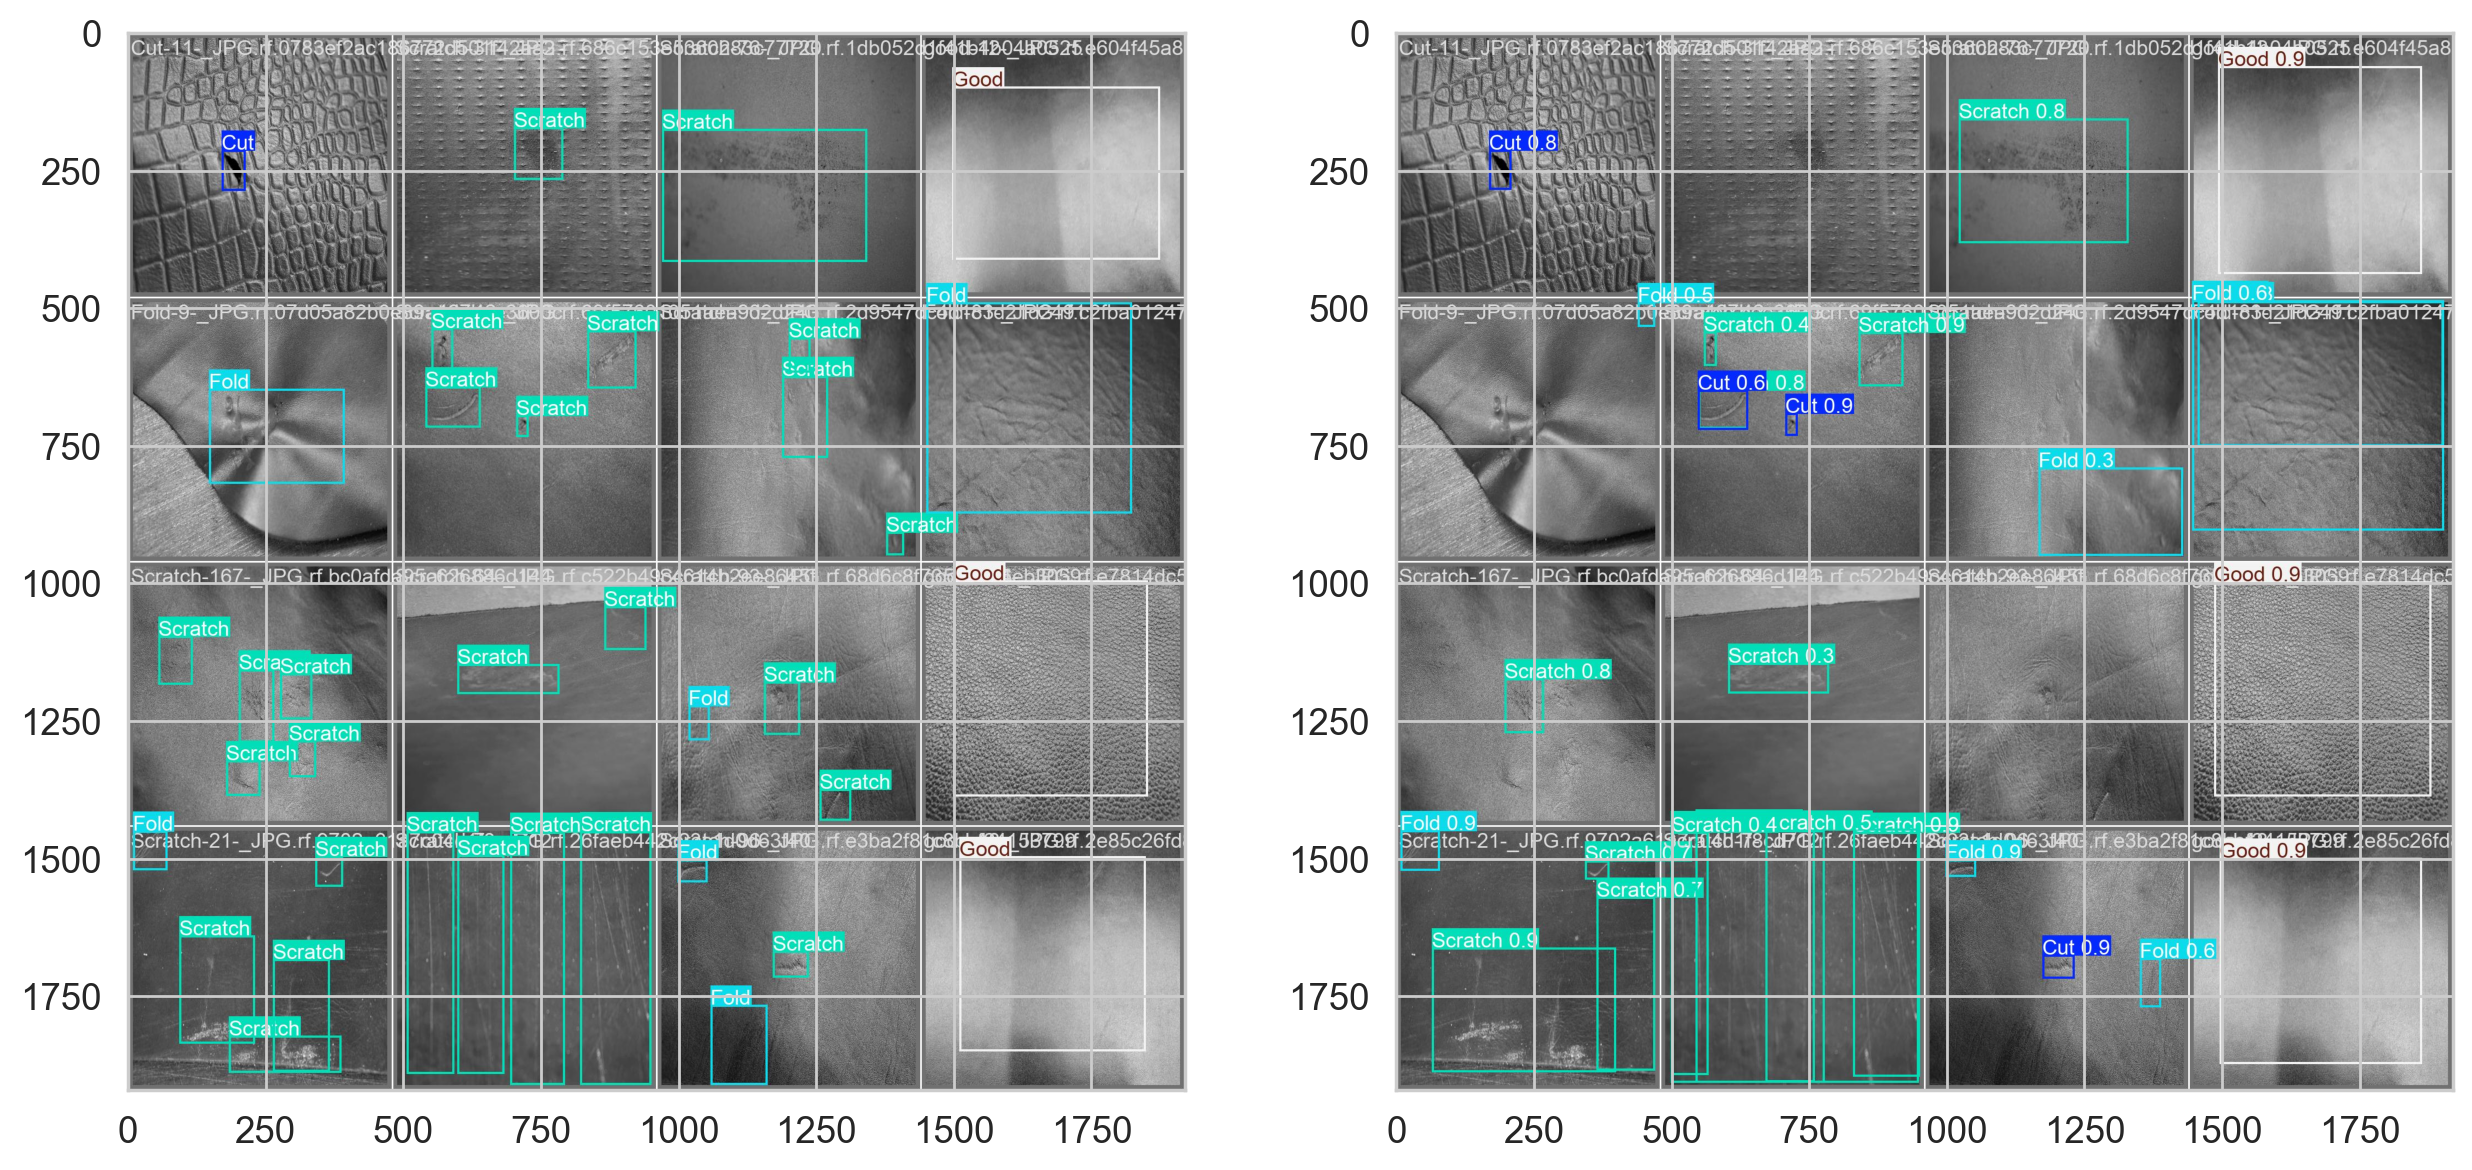

In [ ]:
plot(['val_batch0_labels.jpg','val_batch0_pred.jpg'], (1,2))